In [2]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns

# DATOS ENTRENAMIENTO

951 REGISTROS 

12 VARIABLES
10 USABLES (No incluimos ID ni DATASET(TRAIN, TEST))

In [44]:
dim_tienda = pd.read_csv('DIM_TIENDA.csv')
dim_tienda

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET
0,126,1,BC,Hogar,127.42,13,7,25.69107,-100.21261,Hogar Reunión,UT_DENSIDAD,TRAIN
1,681,1,C,Hogar,128.13,13,0,25.73571,-100.18086,Hogar Reunión,UT_DENSIDAD,TRAIN
2,117,1,C,Base,87.62,11,11,25.71883,-100.19133,Hogar Reunión,UT_DENSIDAD,TRAIN
3,682,1,C,Hogar,90.70,13,0,25.66952,-100.20744,Hogar Reunión,UT_DENSIDAD,TRAIN
4,275,1,C,Hogar,95.30,13,6,25.73766,-100.16116,Hogar Reunión,UT_DENSIDAD,TRAIN
...,...,...,...,...,...,...,...,...,...,...,...,...
946,572,6,C,Hogar,0.00,13,0,25.57330,-100.02196,Hogar Reunión,UT_DENSIDAD,TRAIN
947,492,6,B,Base,0.00,13,0,25.27251,-100.00065,Hogar Reunión,UT_TRAFICO_VEHICULAR,TRAIN
948,172,6,CD,Receso,122.70,8,0,25.19135,-99.81539,Parada Técnica,UT_CARRETERA_GAS,TRAIN
949,748,6,C,Receso,0.00,0,0,25.27433,-100.01648,Parada Técnica,UT_CARRETERA_GAS,TRAIN


In [45]:
dim_tienda['PLAZA_CVE'] = dim_tienda['PLAZA_CVE'].astype(str)

In [46]:
dim_tienda[dim_tienda.LONGITUD_NUM == 0]

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET
344,858,2,C,Receso,0.0,0,0,0.0,0.0,Parada Técnica,UT_TRAFICO_VEHICULAR,TRAIN
680,857,5,C,Hogar,0.0,0,0,0.0,0.0,Hogar Reunión,UT_DENSIDAD,TRAIN


In [47]:
dim_tienda.NIVELSOCIOECONOMICO_DES.value_counts()

NIVELSOCIOECONOMICO_DES
C     670
B      92
BC     73
CD     61
AB     31
D      16
A       8
Name: count, dtype: int64

In [48]:
dim_tienda.ENTORNO_DES.value_counts()

ENTORNO_DES
Hogar       576
Base        228
Receso      140
Peatonal      7
Name: count, dtype: int64

In [49]:
dim_tienda.CAJONESESTACIONAMIENTO_NUM.value_counts()

CAJONESESTACIONAMIENTO_NUM
0     517
10     97
9      58
11     52
7      48
6      40
12     33
8      33
5      31
4      16
13      9
14      8
3       4
15      2
17      2
2       1
Name: count, dtype: int64

In [50]:
dim_tienda.SEGMENTO_MAESTRO_DESC.value_counts()

SEGMENTO_MAESTRO_DESC
Hogar Reunión       609
Parada Técnica      143
Oficinistas          96
Clásico              69
Barrio Competido     27
Name: count, dtype: int64

In [51]:
dim_tienda.LID_UBICACION_TIENDA.value_counts()

LID_UBICACION_TIENDA
UT_DENSIDAD             532
UT_TRAFICO_VEHICULAR    216
UT_GAS_URBANA           102
UT_CARRETERA_GAS         57
UT_TRAFICO_PEATONAL      44
Name: count, dtype: int64

Quitamos tienda_id 858 y 857

In [52]:
dim_tienda = dim_tienda[dim_tienda.LONGITUD_NUM != 0]

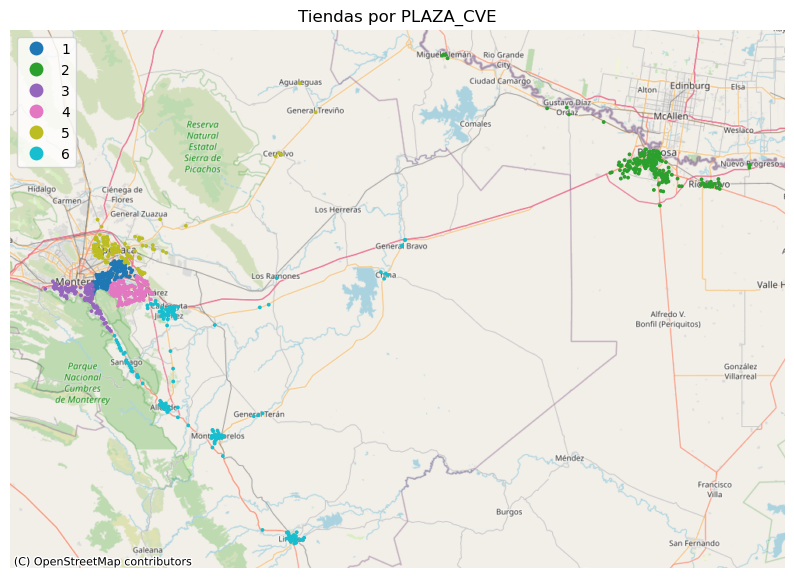

In [95]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Crear el GeoDataFrame
gdf = gpd.GeoDataFrame(
    dim_tienda,
    geometry=gpd.points_from_xy(dim_tienda.LONGITUD_NUM, dim_tienda.LATITUD_NUM),
    crs="EPSG:4326"
)

# Convertir a CRS compatible con contextily (Web Mercator)
gdf = gdf.to_crs(epsg=3857)

# Graficar
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='PLAZA_CVE', ax=ax, legend=True, cmap='tab10', markersize=3)

# Agregar basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Quitar ejes con coordenadas proyectadas y poner título
ax.set_title('Tiendas por PLAZA_CVE')
ax.set_axis_off()
plt.show()


In [ ]:
127

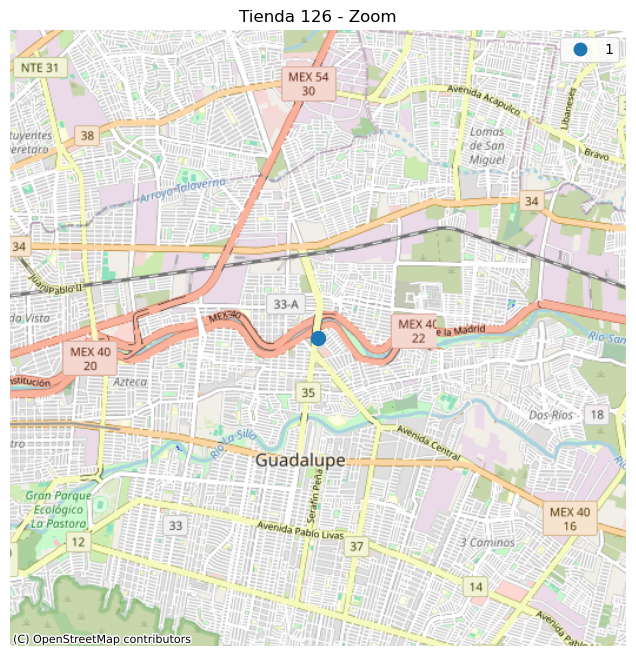

In [100]:
# Graficar
fig, ax = plt.subplots(figsize=(10, 8))
gdf[gdf.TIENDA_ID == 126].plot(column='PLAZA_CVE', ax=ax, legend=True, cmap='tab10', markersize=100)

# Obtener coordenadas de la tienda
tienda = gdf[gdf.TIENDA_ID == 126]
x, y = tienda.geometry.x.values[0], tienda.geometry.y.values[0]

# Ajustar límites para hacer zoom
ax.set_xlim(x - 5000, x + 5000)
ax.set_ylim(y - 5000, y + 5000)

# Agregar basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title('Tienda 126 - Zoom')
ax.set_axis_off()
plt.show()


Text(78.72222222222221, 0.5, 'Latitud')

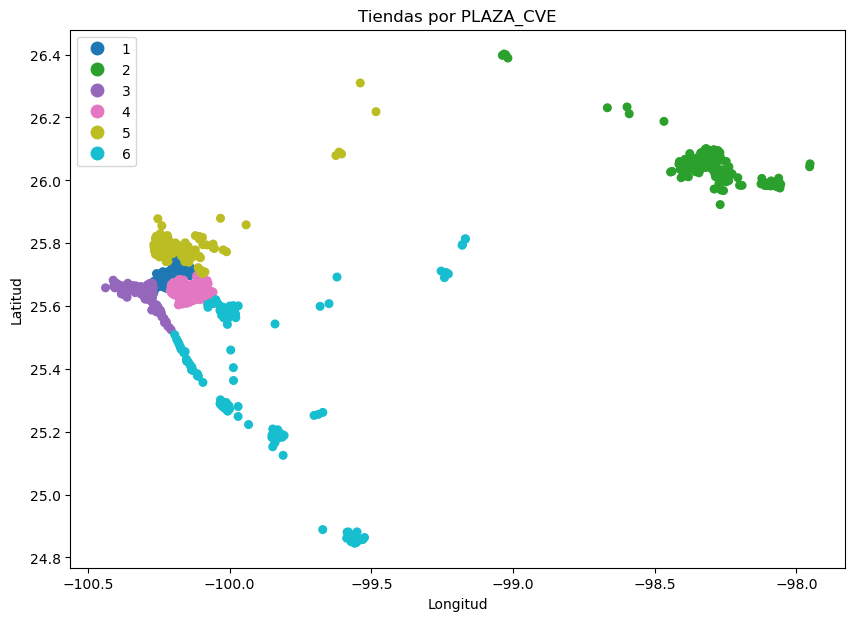

In [ ]:
# Crear un GeoDataFrame a partir de dim_tienda
gdf = geopandas.GeoDataFrame(
    dim_tienda,
    geometry=geopandas.points_from_xy(dim_tienda.LONGITUD_NUM, dim_tienda.LATITUD_NUM),
    crs="EPSG:4326"
)

# Graficar usando plaza_cve como color
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='PLAZA_CVE', ax=ax, legend=True, cmap='tab10', markersize=30)
ax.set_title('Tiendas por PLAZA_CVE')
plt.xlabel('Longitud')
plt.ylabel('Latitud')



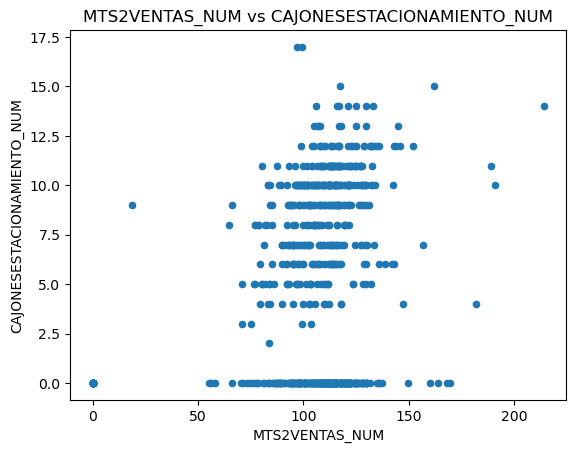

In [57]:
dim_tienda[['MTS2VENTAS_NUM', 'CAJONESESTACIONAMIENTO_NUM']].plot(kind='scatter', x='MTS2VENTAS_NUM', y='CAJONESESTACIONAMIENTO_NUM')
plt.xlabel('MTS2VENTAS_NUM')
plt.ylabel('CAJONESESTACIONAMIENTO_NUM')
plt.title('MTS2VENTAS_NUM vs CAJONESESTACIONAMIENTO_NUM')
plt.show()

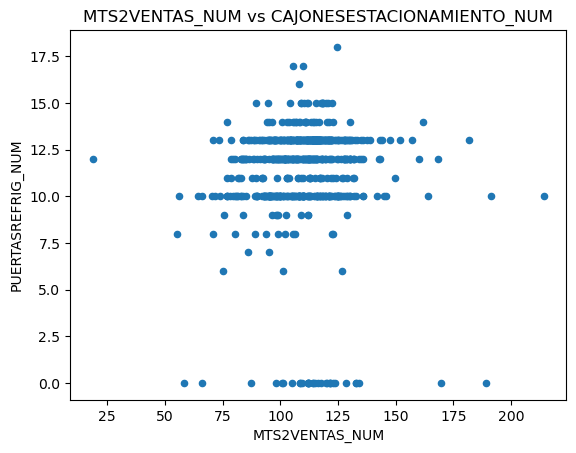

In [71]:
dim_tienda[dim_tienda.MTS2VENTAS_NUM != 0][['MTS2VENTAS_NUM', 'PUERTASREFRIG_NUM']].plot(kind='scatter', x='MTS2VENTAS_NUM', y='PUERTASREFRIG_NUM')
plt.xlabel('MTS2VENTAS_NUM')
plt.ylabel('PUERTASREFRIG_NUM')
plt.title('MTS2VENTAS_NUM vs CAJONESESTACIONAMIENTO_NUM')
plt.show()

In [64]:
dim_tienda[dim_tienda.MTS2VENTAS_NUM != 0]['MTS2VENTAS_NUM'].var()**(1/2)

17.123579518536516

In [67]:
dim_tienda[dim_tienda.MTS2VENTAS_NUM != 0]['MTS2VENTAS_NUM'].median()

110.515

In [74]:
numeric_cols = dim_tienda.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['TIENDA_ID', 'MTS2VENTAS_NUM', 'PUERTASREFRIG_NUM',
       'CAJONESESTACIONAMIENTO_NUM', 'LATITUD_NUM', 'LONGITUD_NUM'],
      dtype='object')

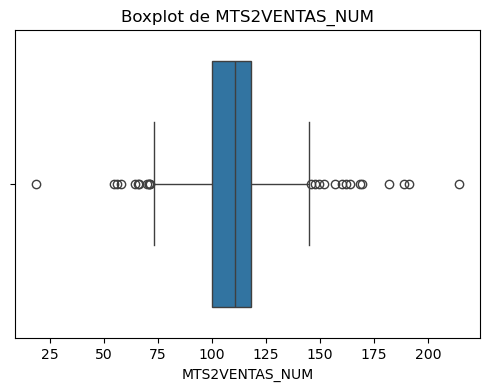

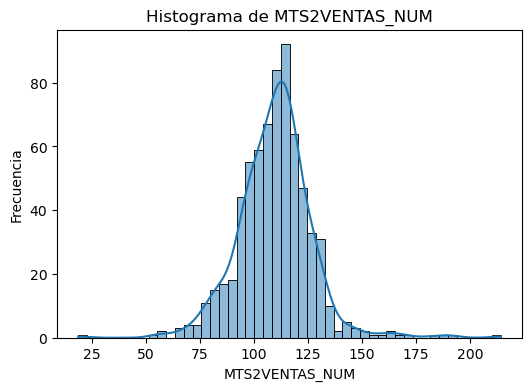

Conteo de datos para MTS2VENTAS_NUM (sin ceros): 684


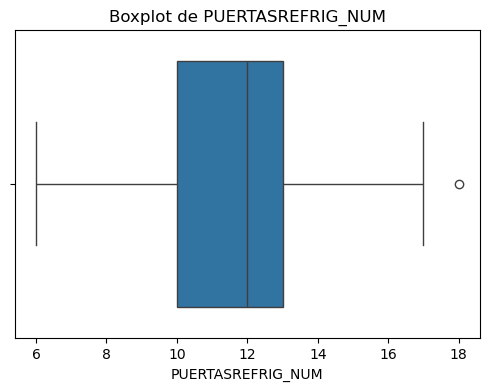

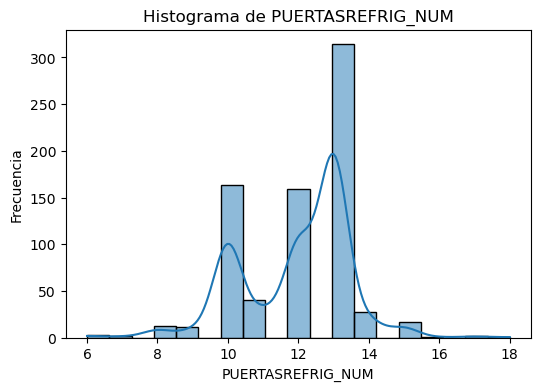

Conteo de datos para PUERTASREFRIG_NUM (sin ceros): 754


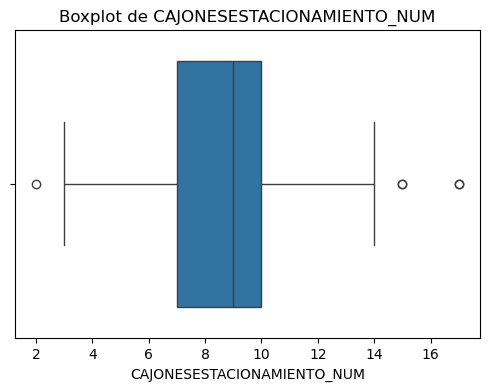

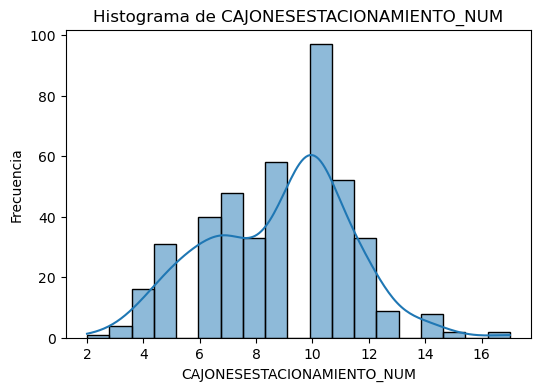

Conteo de datos para CAJONESESTACIONAMIENTO_NUM (sin ceros): 434


In [ ]:
# Boxplot, histograma y conteo de datos para cada variable numérica (sin TIENDA_ID, LATITUD_NUM y LONGITUD_NUM)
for col in numeric_cols_no_id_latlong:
    data_no_zero = dim_tienda[dim_tienda[col] != 0][col]
    
    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data_no_zero)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()
    
    # Histograma
    plt.figure(figsize=(6, 4))
    sns.histplot(data_no_zero, kde=True, bins=)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()
    
    # Conteo de datos
    print(f'Conteo de datos para {col} (sin ceros): {data_no_zero.count()}')

In [10]:
test = pd.read_csv('DIM_TIENDA_TEST.csv')
test

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET
0,680,1,C,Hogar,102.36,13,0,25.65488,-100.21207,Hogar Reunión,UT_DENSIDAD,TEST
1,730,1,C,Hogar,97.43,14,0,25.66315,-100.22738,Hogar Reunión,UT_DENSIDAD,TEST
2,650,1,C,Hogar,117.01,13,0,25.66404,-100.22993,Hogar Reunión,UT_DENSIDAD,TEST
3,670,1,C,Base,109.76,13,0,25.66508,-100.26338,Hogar Reunión,UT_DENSIDAD,TEST
4,800,1,C,Peatonal,0.00,0,0,25.69367,-100.21433,Parada Técnica,UT_TRAFICO_PEATONAL,TEST
...,...,...,...,...,...,...,...,...,...,...,...,...
100,720,6,C,Hogar,0.00,0,0,25.60253,-99.99317,Hogar Reunión,UT_DENSIDAD,TEST
101,130,6,CD,Base,110.06,10,0,25.36439,-100.10202,Hogar Reunión,UT_TRAFICO_VEHICULAR,TEST
102,320,6,C,Hogar,122.00,10,0,25.57214,-100.01371,Hogar Reunión,UT_TRAFICO_VEHICULAR,TEST
103,510,6,B,Hogar,0.00,13,0,25.19747,-99.83198,Hogar Reunión,UT_TRAFICO_VEHICULAR,TEST


# ventas

In [5]:
meta_venta = pd.read_csv('Meta_venta.csv')
meta_venta

,ENTORNO_DES,Meta_venta
0,Base,480000
1,Hogar,490000
2,Peatonal,420000
3,Receso,516000


In [12]:
venta = pd.read_csv('Venta.csv')
venta[venta.TIENDA_ID == 680]

,TIENDA_ID,MES_ID,VENTA_TOTAL
245,680,202411,680952.50
962,680,202305,368427.77
2111,680,202306,700092.96
3551,680,202307,619600.33
5587,680,202404,840681.62
5983,680,202302,347139.89
6650,680,202401,789553.27
7179,680,202403,807132.47
7676,680,202309,887075.12
7825,680,202312,541081.82


In [9]:
venta.describe()

,TIENDA_ID,MES_ID,VENTA_TOTAL
count,21381.000000,21381.000000,2.138100e+04
mean,517.067443,202350.053693,1.058229e+06
std,304.120250,49.328270,4.433803e+05
min,1.000000,202301.000000,0.000000e+00
25%,255.000000,202306.000000,7.514508e+05
50%,510.000000,202311.000000,1.014591e+06
75%,765.000000,202404.000000,1.311946e+06
max,1056.000000,202412.000000,3.848653e+06
